# Machine Learning & Statistics Project 2020
By Kevin Dooley

![image](wind.png)

### Project Objective
To create a web service that uses machine learning to make predictions based on the data set, `powerproduction` which is saved in this repository. The goal is to produce a model that accurately predicts wind turbine poweroutput from windspeed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

### Background on Wind Energy & Power

Wind energy refers to the process of creating electricity o rmechanical power using the wind, or air flows that occur naturally in the earth’s atmosphere. Modern wind turbines are used to capture kinetic energy from the wind and generate electricity. [7]

Wind energy provides a clean and sustainable solution to our energy problems. It can be used as an alternative to fossil fuels in generating electricity, without the direct emission of greenhouse gases. Wind will always be inexhaustible and shoudl be utilised. Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. [8]

### How Wind Turbines Work
Wind turbines work on a simple principle, as the name suggests, they use wind to make electricity. Wind turns the propeller blades of a turbine around a rotor. That rotor then spins a generator which in turn creates electricity. There is aerodynamic force created from the rotation of rotor blades. These are connected to the generator. The translation of aerodynamic force to rotation of a then generator creates electricity. 

### Modelling  Wind energy
The modelling of wind energy is a very important aspect of the process as you do not have a definite or known amount of energy that will be returned at all times, it depends on numerous factors. Mainly the speed of wind. Wind energy system models can be used to predict on wind resource, electrical response/power generated and the returns of economic market. [10] They will be used to predict expected power output in this project. 

In [2]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

#### Load Dataset
To be able to give an overview of the dataset, I had to first obtain it. Copied and saved the dataset from Moodle as a CSV file in my repository. This was saved as powerproduction.csv and was the basis of the project.

In [3]:
df = pd.read_csv("powerproduction.csv") #read the csv file using pandas
df # called the dataset df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
print("Rows x Columns:", df.shape)

Rows x Columns: (500, 2)


The powerproduction.csv has two variables: speed and power. There are also 500 rows in the dataset.

In [5]:
# glance at data - show first 5 rows
df.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
# glance at data - show last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [7]:
# glance at data - show 15 rows
df.sample(15)

,speed,power
370,18.594,100.485
204,10.285,20.636
322,16.441,89.134
107,5.681,3.036
225,11.361,38.184
319,16.241,87.192
128,6.481,10.262
97,5.180,4.525
317,16.091,90.412
158,7.833,11.321


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


By using these simple functions it is easy to do a overview comparision for both variables of the dataset. These functions do not really tell us much information but they do familarise us with the dataset. The first observation to make from the above is that there appears to be a power output of 0watt, when in fact there was substantial windspeed. This will need to be investigated further but you could make a reasonable assumption that there was an issue or downtime during these periods. Wind Turbines also shutdown automatically if wind speeds are too high and that may also be a contributing factor. 

In [9]:
#describe function to show statistical summary of the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistical summary above gives us a top level look at the dataset. It can be seen that that the average wind speed is 12.59m/s and the average power output is 48.01MW.

### Plot Dataset

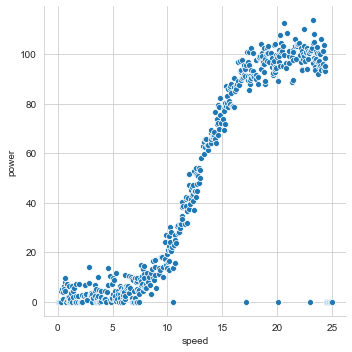

In [10]:
# https://seaborn.pydata.org/generated/seaborn.relplot.html
#scatterplot showing relationship wind v power
sns.set_style('whitegrid')
sns.relplot(x="speed", y="power",data=df)


Text(0.5, 1.0, 'Wind Speed vs Generated Power ')

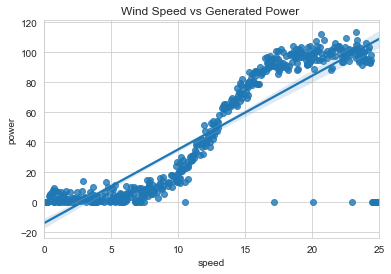

In [11]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=df)
reg.set_title("Wind Speed vs Generated Power ")

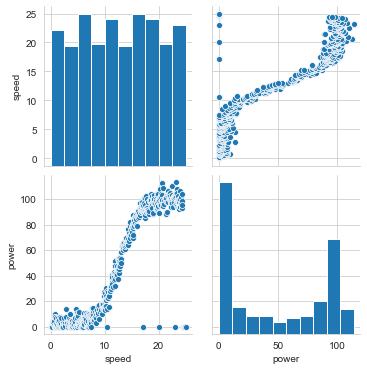

In [12]:
sns.pairplot(df)

The above relationship plots are clearly indicating that there are some outliers in the dataset. As mentioned above, the values for power generated are 0KW when the wind speed is up to 25m/s which indicates there was downtime either due to a known/unknown issue or maintenance. 

The graph below depicts the relationship between wind speed and power production. The graph illustrates typical wind turbine power curve in which you can determine the cut-in, nominal and cut-out speed. The cut-in speed (approx. 3.5m/s) is the minimum threshold wind speed must reach for the turbine to begin generating electricity. A turbine will achieve its nominal power output at appox. 12 - 14m/s and the turbine will reach its cut-out speed at approximately 25 m/s. The cut-out point means the turbine stops power production to protect itself from potentially damaging speeds. [11]

As can been seen in plots above, the 0MW power outputs close to 25m/s may in fact be as a result of the wind turbine coming close to its cut-out point rather than an issue or maintenance. As per the source above, the cut-off point is approx 25m/s but depending on the type and location of the turbine, one could assume that the cut-off point could vary slightly and based on the plots above, many of those 0KW power outputs occur from appox. 23.5m/s onwards. The other outliers from approx 10 - 20m/s would most likely be as a result of planned/unlanned maintenance. 
![image](wind_vs_power.png)

It is important that you complete data cleaning when doing data analysis. When completing a model or prediction, it is important to have accurate information. Data cleansing  improves your data quality by finding and eliminating errors in the data and in doing so, increases overall productivity. When you clean your data, all outdated, incorrect or misleading information is removed – leaving you with the highest quality information to then complete your analysis on. [12] 

This dataset has results in it that can be removed (cleaned up) i.e maintenance and wind-cut out speed. if we left these results in the dataset, it could lead to less accurate modelling and predictions.

In [13]:
# adapted from https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
# remove unexpected zeros from dataset as these will zeros will make our modelling less accurate
# show values not equal 0
zero_removed = df[(df["speed"]!=0) & (df["power"]!=0)]
zero_removed


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [35]:
# missing first zero of dataset
#need to incorporate as it is correct - 0 wind speed will give 0 output
zero_included = df[(df["speed"]==0) & (df["power"]==0)]
#zero_included

new_df = zero_included.append(zero_removed)
ds = new_df #new dataframe with zero added at the start 

#ds to be used as new dataset

Text(0.5, 1.0, 'Wind Speed vs Generated Power - Clean')

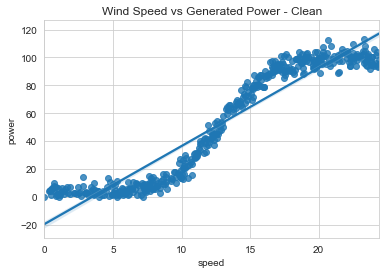

In [36]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=ds)
reg.set_title("Wind Speed vs Generated Power - Clean")

The unexpected zero results have now been removed from the dataset. You can see from both the plot and table above, the 0KW output datapoints have now been removed. The dataset has been cleaned up and it is now in a better state to complete data analysis on it. 

### Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). [4] Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). Basically that y can be calculated from a linear combination of the input variables (x). [5] In this instance, wind speed in the (x) input and power the (y) output variable. 

Before attempting to fit a linear model to observed data, you should first determine whether or not there is a relationship between the variables of interest, i.e wind energy and power. This does not necessarily imply that one variable causes the other but that there is some significant association between the two variables. A scatterplot can be a helpful tool (as seen above) in determining the strength of the relationship between two variables. If there appears to be a relationship between the proposed explanatory and dependent variables, then fitting a linear regression model to the data may be useful. If there is no relationship, it will most likely not be useful. [13]

There are two main ways to perform linear regression in Python — with Statsmodels and scikit-learn. In this example, I will use scikit-learn to complete the model assisted by numpy and pandas. Sk-Learn is one of the golden standard libraries when it comes to machine learning in Python and contains many packages, one of which is regression. To start it, you must first import the package - `import sklearn.linear_model as lm`.

The powerproduction dataset is suitable for a regression model because it contains two variables that can be measured at a continuous level. Based on the plots above, it appears that a linear regression could work but may no the the best fit and not provide meaningful or accurate data, possibly a polynomial regression fit model would work better. Linear regression will be examined though to determine its suitability. 

In [44]:
#lecture - link to repo
#create linear model instance
# adapted from https://realpython.com/linear-regression-in-python/
m = lm.LinearRegression()

In [45]:
#create x & y
x = ds["speed"]
y = ds["power"]

# x must be 2 dimensional. .reshape(-1,1) changes x to 2 dimensional (single column)
x = x.values.reshape(-1, 1)

#model to fit data
reg_model = m.fit(x,y)
reg_model

LinearRegression()

In [46]:
#intercept
m.intercept_

-19.636232996770858

In [47]:
#coefficient
m.coef_

array([5.60668469])

In [48]:
#how good is the model
m.score(x,y)

0.8983450728341917

In [49]:
#predict
predict = reg_model.predict(x)
predict

array([-19.636233  , -17.81406047, -17.39355912, -17.11322489,
       -16.82728397, -16.68711685, -16.54694973, -16.40678261,
       -16.12644838, -15.84611415, -15.70594703, -15.14527856,
       -15.00511144, -14.86494432, -14.44444297, -14.30427586,
       -14.16410874, -14.02394162, -13.74360739, -13.46327315,
       -13.18293892, -12.62227045, -12.48210333, -11.78126774,
       -11.64110063, -11.21499259, -10.37398989, -10.09365565,
        -9.11248583,  -8.97231871,  -7.43048042,  -7.15014619,
        -6.16897637,  -5.74847502,  -5.32236698,  -5.18219986,
        -4.48136428,  -3.78052869,  -3.64036157,  -3.0796931 ,
        -2.79935887,  -2.65919175,  -2.51902463,  -2.37885752,
        -1.67802193,  -0.69685211,  -0.55668499,  -0.41651787,
         0.14975728,   0.57025863,   0.71042575,   1.1309271 ,
         1.27109422,   2.25226404,   2.39243116,   2.53259827,
         2.67276539,   3.79410233,   4.49493792,   4.63510503,
         5.76204866,   5.90221577,   6.18255001,   6.88

In [50]:
#get y predict calculated manually
pred = m.intercept_ + m.coef_ * x
#pred

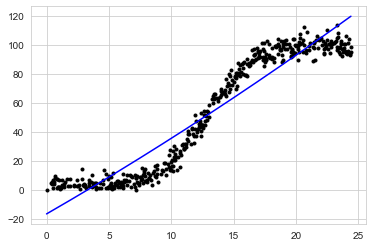

In [53]:
#link to repo lecture notes
#plot showing model in blue vs actual
x = ds["speed"].to_numpy()
y = ds["power"].to_numpy()

a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'b-');

In [55]:
# dataframe to compare actual vs predicted power for linear regression
compare = pd.DataFrame({'Wind Speed':x,'Actual Power': y, 'Predicted Power': predict})
compare

,Wind Speed,Actual Power,Predicted Power
0,0.000,0.000,-19.636233
1,0.325,4.331,-17.814060
2,0.400,5.186,-17.393559
3,0.450,3.826,-17.113225
4,0.501,1.048,-16.827284
...,...,...,...
447,24.249,103.700,116.320264
448,24.299,93.694,116.600598
449,24.349,93.078,116.880933
450,24.374,98.223,117.021100


The table and plot above seems to indicate that linear regression may not be the most accurate model for this dataset as initially expected. The comparision shows that predicted powers are not very likely and the model is not a good fit. There are huge differences in actual vs predicted power output, if you look at index 450, the actual power is 98MW and the predicted is 117MW. The prediction power output yields a error of 19MW. For example, assuming the power measurement is `MW- Megawatt` (the usual output of wind turbines),that preidcted error of 19MW could result in the company making poor choices that would most likely negatively affect the Wind Turbine Company, either economically or otherwise.  Examing indexes 447 - 451 all yield similiar differences between the actual vs predicted. 

The table also shows negative predicted powers when the wind speed is very incorrect. Even when wind speed is at 0m/s, the model predicts that the predicted power should be -19.6MW indicating the wind turbine consuming huge amounts of energy it is  while it is static. And while wind turbines do consume energy, it would not to be that significant. Overall, it can be concluded that linear regression is not the best fit model for this data and a more accurate model can be determined. 

## Neural Networks

In [25]:
# adapted from lectures
import tensorflow.keras as kr

In [26]:
# A sequential model
model = kr.models.Sequential()

In [27]:
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [28]:
neuron_model = model.fit(x, y, epochs=500, batch_size=10)
neuron_model 

Epoch 1/500
46/46 [==============================] - 1s 1ms/step - loss: 4562.1015
Epoch 2/500
46/46 [==============================] - 0s 989us/step - loss: 4516.0868
Epoch 3/500
46/46 [==============================] - 0s 848us/step - loss: 4719.2680
Epoch 4/500
46/46 [==============================] - 0s 926us/step - loss: 4602.4526
Epoch 5/500
46/46 [==============================] - 0s 889us/step - loss: 4505.8491
Epoch 6/500
46/46 [==============================] - 0s 800us/step - loss: 4442.7901
Epoch 7/500
46/46 [==============================] - 0s 867us/step - loss: 4523.8091
Epoch 8/500
46/46 [==============================] - 0s 890us/step - loss: 4370.4450
Epoch 9/500
46/46 [==============================] - 0s 778us/step - loss: 4259.7715
Epoch 10/500
46/46 [==============================] - 0s 822us/step - loss: 4363.6809
Epoch 11/500
46/46 [==============================] - 0s 823us/step - loss: 4303.5888
Epoch 12/500
46/46 [==============================] - 0s 823us/st

46/46 [==============================] - 0s 667us/step - loss: 1062.1669
Epoch 191/500
46/46 [==============================] - 0s 622us/step - loss: 1104.5751
Epoch 192/500
46/46 [==============================] - 0s 622us/step - loss: 1087.7658
Epoch 193/500
46/46 [==============================] - 0s 644us/step - loss: 1189.3708
Epoch 194/500
46/46 [==============================] - 0s 622us/step - loss: 1066.0012
Epoch 195/500
46/46 [==============================] - 0s 666us/step - loss: 1017.6329
Epoch 196/500
46/46 [==============================] - 0s 689us/step - loss: 1123.4268
Epoch 197/500
46/46 [==============================] - 0s 711us/step - loss: 1032.4171
Epoch 198/500
46/46 [==============================] - 0s 711us/step - loss: 1065.2469
Epoch 199/500
46/46 [==============================] - 0s 667us/step - loss: 1078.8094
Epoch 200/500
46/46 [==============================] - 0s 644us/step - loss: 1032.1343
Epoch 201/500
46/46 [==============================] - 0s

46/46 [==============================] - 0s 733us/step - loss: 40.3366
Epoch 380/500
46/46 [==============================] - 0s 800us/step - loss: 38.6985
Epoch 381/500
46/46 [==============================] - 0s 667us/step - loss: 40.4634
Epoch 382/500
46/46 [==============================] - 0s 711us/step - loss: 41.2333
Epoch 383/500
46/46 [==============================] - 0s 734us/step - loss: 38.2290
Epoch 384/500
46/46 [==============================] - 0s 866us/step - loss: 37.3747
Epoch 385/500
46/46 [==============================] - 0s 755us/step - loss: 41.0533
Epoch 386/500
46/46 [==============================] - 0s 778us/step - loss: 38.2023
Epoch 387/500
46/46 [==============================] - 0s 778us/step - loss: 30.4387
Epoch 388/500
46/46 [==============================] - 0s 711us/step - loss: 38.3814
Epoch 389/500
46/46 [==============================] - 0s 711us/step - loss: 33.0221
Epoch 390/500
46/46 [==============================] - 0s 733us/step - loss: 31

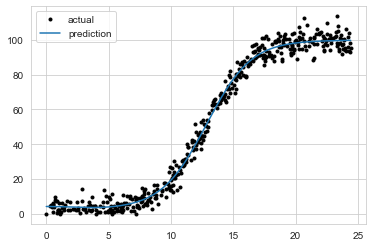

In [29]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

### References

1. https://github.com/kevindooley/fundamentals-data-analysis-project/blob/master/tips_dataset.ipynb
2. https://seaborn.pydata.org/generated/seaborn.relplot.html
3. https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
4. wiki
5. https://machinelearningmastery.com/linear-regression-for-machine-learning/
6. https://realpython.com/linear-regression-in-python/
7. https://www.awea.org/wind-101/basics-of-wind-energy#:~:text=When%20the%20wind%20blows%20past,a%20generator%20that%20produces%20electricity.
8. https://www.seai.ie/technologies/wind-energy/
9. https://www.energy.gov/eere/wind/how-do-wind-turbines-work#:~:text=Wind%20turbines%20work%20on%20a,a%20generator%2C%20which%20creates%20electricity.
10. https://www.sciencedirect.com/science/article/abs/pii/S0306261919304970
11. file:///C:/Users/doolek3/Downloads/NY-Wind-Energy-Guide-1.pdf
12. https://www.blue-pencil.ca/data-cleansing-what-is-it-and-why-is-it-important/#:~:text=Data%20cleansing%20is%20also%20important,with%20the%20highest%20quality%20information.
13. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm